In [15]:
import numpy as np 
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt

# Black-Scholes-Merton :

$ S_T = S_0 \exp ( (r - \frac{ \sigma ^2}{2})T + \sigma \sqrt{T} Z ) $ où $Z \sim \mathcal{N}(0,1)$

On donne $ S_0 = 100 , \sigma = 0.2 , T = 1 , r = 0.05 , K = 105 $. 


In [2]:
# Fixons les paramètres
s_0 = 100 
sigma = 0.2 
T = 1 
r = 0.05 
K = 105

In [4]:
# On commence par simuler n réalisations de Z 
n = 100000
Z = np.random.normal(0, 1, size = n)

# On calcule les valeurs de S correspondantes 
S_T = s_0 * np.exp((r - (sigma **2) / 2) * T + sigma * Z * np.sqrt(T))

# On calcule les payoffs correspondants 
h_T = np.maximum(S_T - K, 0)

# On calcule l’estimation du prix du Call au temps 0
C_O = (np.exp(- r * T) / n) * np.sum(h_T)

print(f"On estime le prix du call au temps 0 à {C_O}")

On estime le prix du call au temps 0 à 7.9560467751386925


La **volatilité** réalisée représente la variabilité des rendements d’un actif et, par conséquent, le risque que supporte un investisseur en détenant un tel actif. Cette volatilité peut être calculée aussi bien sur des actions, sur des indices, sur des paires de devises, etc. Lors d’un krach boursier ou d’une forte baisse sur les marchés, la volatilité augmente fortement. Bien que la volatilité réalisée d’un actif puisse connaître des « pics », celle-ci a également tendance à revenir à sa moyenne.

L’une des façons les plus simples de mesurer la volatilité réalisée est d’étudier les log-rendements d’un actif, sur une période donnée, pouvant aller de quelques jours à plusieurs années. Le choix de la période est important. Plus le laps de temps choisi est court, plus le niveau volatilité pourra être affecté par un fort mouvement isolé. Plus le laps de temps choisi est long, plus les mouvements isolés seront dilués dans le temps.

La volatilité est enfin exprimée en pourcentage et est annualisée. Elle représente alors l’écart-type des rendements constatés, en partant du principe que les rendements sont tous indépendants.

Pour mesurer la volatilité, il faut donc calculer l’écart type des variations. Une fois la valeur de l’écart type obtenue, il est important de procéder à “l’annualisation” de la volatilité.

Formule retenue : $ \sigma = \sqrt{ \frac{ \displaystyle \sum _{i=1} ^{N} (x_i - m)^2}{n}}$. Avec $m$ la moyenne des $N$ variations et $x_i$ la $i$-ème variation. 

Puis la valeur est la volatilité annualisée est : $ \sqrt{252} \sigma$. 

In [23]:
# Calculer la volatilité de log-rendements de l’action TESLA
start = dt.datetime(2014,1,1)
end = dt.datetime(2023,10,31)
tsla = yf.download("TSLA", start=start, end=end)

# Calcul du log-return 
tsla['log-return'] = np.log(tsla['Close'] / tsla['Close'].shift(1))
tsla['volatility'] = tsla['log-return'].rolling(252).std() * np.sqrt(252)

[*********************100%***********************]  1 of 1 completed


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

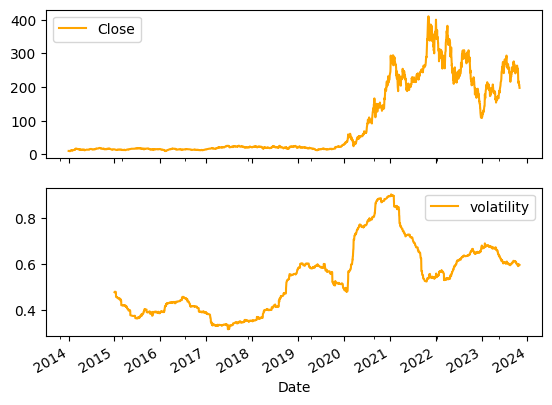

In [25]:
tsla[['Close','volatility']].plot(subplots=T,color='orange')